In [1]:
## Bring in needed mods
import numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
## set path and bring in the data
## The index of this dataframe should be the strain
file_path = '../DATA/PHENOTYPE/H2O2/H2O2_data.csv'
pheno = pd.read_csv(file_path,index_col=0)
pheno.head()

,H2O2,SSK1,SSK2,RIC8
SS-A837,2.0,1.0,1.0,1.0
SS-B307,0.5,0.0,0.0,1.0
SS-B310,0.0,1.0,0.0,1.0
SS-B311,4.0,0.0,1.0,1.0
SS-B312,5.0,0.0,1.0,0.0


In [7]:
## Set labels 
from matplotlib import rc
xl280_label = 'XL280' +r'$\bf{a}$'
_431_label = '431'+r'$\mathrm{\alpha}$'

## Add parental labels into a list
parental_label = [xl280_label,_431_label]

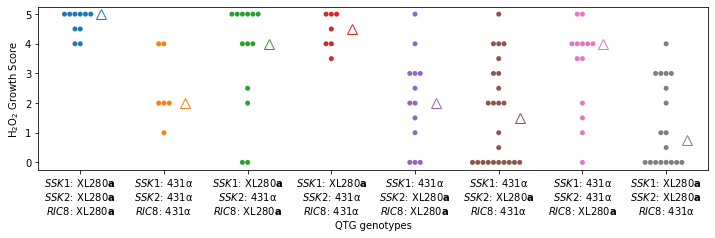

In [8]:
## Group and orient genotypes by the three QTGs and plot
pheno['new_mosaic'] = -1
for i,a in enumerate(pheno.groupby(['SSK1','SSK2','RIC8'])):
    
    pheno.loc[a[1].index,'new_mosaic'] = i
    
temp_mosaic = pheno[(pheno.RIC8==1) & (pheno.SSK2==1) & (pheno.SSK1==1)].new_mosaic.min()

pheno.loc[(pheno.RIC8==1) & (pheno.SSK2==1) & (pheno.SSK1==1),'new_mosaic'] = -temp_mosaic

pheno.loc[(pheno.new_mosaic==1),'new_mosaic'] = temp_mosaic
pheno.loc[(pheno.new_mosaic==-temp_mosaic),'new_mosaic'] = 1

assert pheno.new_mosaic.min()>=0

new_mosaic_df = pheno[['SSK1','SSK2','RIC8','new_mosaic']].drop_duplicates().sort_values('new_mosaic').copy()

xlabel = '$SSK1$: %s\n$SSK2$: %s\n$RIC8$: %s'
new_x_labels = []

for i,j in new_mosaic_df.iterrows():
    
    xlab = xlabel%(parental_label[int(j.SSK1)],parental_label[int(j.SSK2)],parental_label[int(j.RIC8)])
    new_x_labels.append(xlab)
    
fig,ax= plt.subplots(1,1,figsize=(12,3))
#sns.boxplot(x='new_mosaic',y='H2O2',data=pheno,color='w')
sns.swarmplot(x='new_mosaic',y='H2O2',data=pheno);

for i,j in pheno.groupby('new_mosaic'):
    
    plt.plot(i+.25,j.H2O2.median(),'^',fillstyle='none',ms=10)

plt.ylabel('H$_{2}$O$_{2}$ Growth Score')
plt.xlabel('QTG genotypes')
plt.xticks(new_mosaic_df.new_mosaic,new_x_labels,fontsize=10);

In [9]:
## Group and orient genotypes by the three QTGs and plot
pheno['new_mosaic'] = -1
for i,a in enumerate(pheno.groupby(['SSK1','SSK2','RIC8'])):
    
    pheno.loc[a[1].index,'new_mosaic'] = i
    
temp_mosaic = pheno[(pheno.RIC8==1) & (pheno.SSK2==1) & (pheno.SSK1==1)].new_mosaic.min()

pheno.loc[(pheno.RIC8==1) & (pheno.SSK2==1) & (pheno.SSK1==1),'new_mosaic'] = -temp_mosaic

pheno.loc[(pheno.new_mosaic==1),'new_mosaic'] = temp_mosaic
pheno.loc[(pheno.new_mosaic==-temp_mosaic),'new_mosaic'] = 1

assert pheno.new_mosaic.min()>=0

new_mosaic_df = pheno[['SSK1','SSK2','RIC8','new_mosaic']].drop_duplicates().sort_values('new_mosaic').copy()

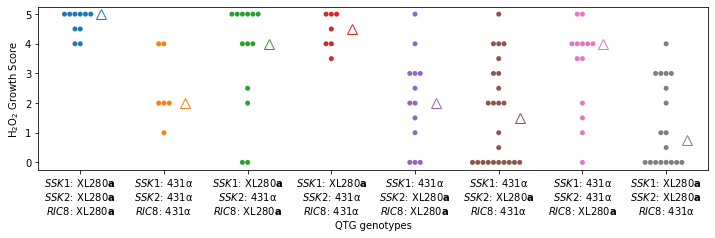

In [10]:
## Group and orient genotypes by the three QTGs and plot
pheno['new_mosaic'] = -1
for i,a in enumerate(pheno.groupby(['SSK1','SSK2','RIC8'])):
    
    pheno.loc[a[1].index,'new_mosaic'] = i
    
temp_mosaic = pheno[(pheno.RIC8==1) & (pheno.SSK2==1) & (pheno.SSK1==1)].new_mosaic.min()

pheno.loc[(pheno.RIC8==1) & (pheno.SSK2==1) & (pheno.SSK1==1),'new_mosaic'] = -temp_mosaic

pheno.loc[(pheno.new_mosaic==1),'new_mosaic'] = temp_mosaic
pheno.loc[(pheno.new_mosaic==-temp_mosaic),'new_mosaic'] = 1

assert pheno.new_mosaic.min()>=0

new_mosaic_df = pheno[['SSK1','SSK2','RIC8','new_mosaic']].drop_duplicates().sort_values('new_mosaic').copy()

xlabel = '$SSK1$: %s\n$SSK2$: %s\n$RIC8$: %s'
new_x_labels = []

for i,j in new_mosaic_df.iterrows():
    
    xlab = xlabel%(parental_label[int(j.SSK1)],parental_label[int(j.SSK2)],parental_label[int(j.RIC8)])
    new_x_labels.append(xlab)
    
fig,ax= plt.subplots(1,1,figsize=(12,3))
#sns.boxplot(x='new_mosaic',y='H2O2',data=pheno,color='w')
sns.swarmplot(x='new_mosaic',y='H2O2',data=pheno);

for i,j in pheno.groupby('new_mosaic'):
    
    plt.plot(i+.25,j.H2O2.median(),'^',fillstyle='none',ms=10)

plt.ylabel('H$_{2}$O$_{2}$ Growth Score')
plt.xlabel('QTG genotypes')
plt.xticks(new_mosaic_df.new_mosaic,new_x_labels,fontsize=10);

In [11]:
## Make a unique combination of genotypes at the three loci
genos = pd.DataFrame([(0,0,0),(1,1,1),
         (0,1,0),(1,0,1),
         (0,1,1),(1,0,0),
         (1,1,0),(0,0,1)],columns=['SSK1','SSK2','RIC8'])
genos

,SSK1,SSK2,RIC8
0,0,0,0
1,1,1,1
2,0,1,0
3,1,0,1
4,0,1,1
5,1,0,0
6,1,1,0
7,0,0,1


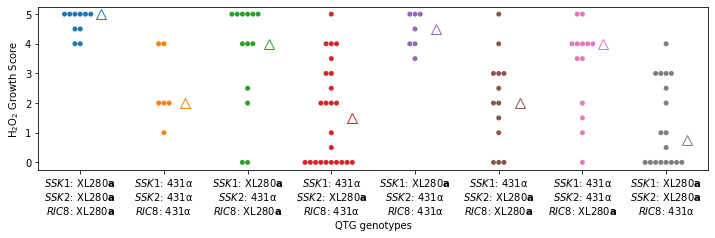

In [12]:
## Plot via mirror genotype
pheno['new_mosaic'] = -1

poi = 'H2O2'
for i,j in genos.iterrows():
    
    
    pheno.loc[(pheno.SSK1==j.SSK1) & (pheno.SSK2==j.SSK2) & (pheno.RIC8==j.RIC8),'new_mosaic'] = i
    
assert pheno.new_mosaic.min()>=0

new_mosaic_df = pheno[['SSK1','SSK2','RIC8','new_mosaic']].drop_duplicates().sort_values('new_mosaic').copy()

xlabel = '$\mathit{SSK1}$: %s\n$SSK2$: %s\n$RIC8$: %s'
new_x_labels = []

for i,j in new_mosaic_df.iterrows():
    
    xlab = xlabel%(parental_label[int(j.SSK1)],parental_label[int(j.SSK2)],parental_label[int(j.RIC8)])
    new_x_labels.append(xlab)
    
fig,ax= plt.subplots(1,1,figsize=(12,3))
#sns.boxplot(x='new_mosaic',y='poi',data=pheno,color='w')
sns.swarmplot(x='new_mosaic',y=poi,data=pheno);

for i,j in pheno.groupby('new_mosaic'):
    
    plt.plot(i+.25,j[poi].median(),'^',fillstyle='none',ms=10)

plt.ylabel('H$_{2}$O$_{2}$ Growth Score')
plt.xlabel('QTG genotypes')
plt.xticks(new_mosaic_df.new_mosaic,new_x_labels,fontsize=10);

In [13]:
## Bring in addtional mods
from PIL import Image

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

## Set colors
morecolors = ['tab:blue','tab:orange','tab:green','tab:red',
              'tab:purple','tab:brown','tab:pink','tab:grey']

In [14]:
## assign genotype colors
my_pal = dict(zip(new_mosaic_df.new_mosaic,morecolors))

Text(0.05, -0.2, 'B')

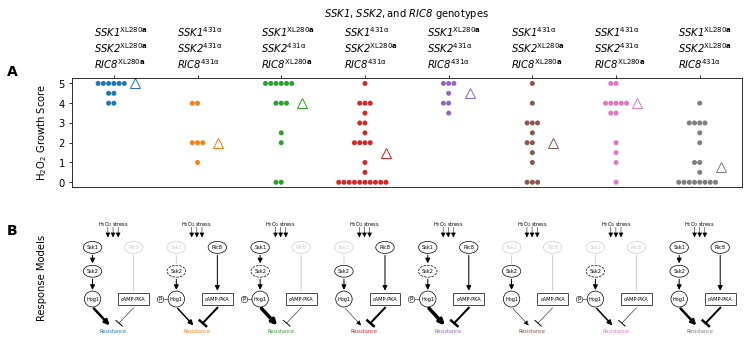

In [15]:
## rough draft of reponse model
pheno['new_mosaic'] = -1

poi = 'H2O2'
for i,j in genos.iterrows():
    
    
    pheno.loc[(pheno.SSK1==j.SSK1) & (pheno.SSK2==j.SSK2) & (pheno.RIC8==j.RIC8),'new_mosaic'] = i
    
assert pheno.new_mosaic.min()>=0

new_mosaic_df = pheno[['SSK1','SSK2','RIC8','new_mosaic']].drop_duplicates().sort_values('new_mosaic').copy()
parental_label = [r'XL280\bf{a}',r'431\mathrm{\alpha}']
#xlabel = r'SSK1: {\rm %s} SSK2: {\rm %s} RIC8: %s'
new_x_labels = []
simple_parents = ['XL280','431']
load_images = []

for i,j in new_mosaic_df.iterrows():
    
    xlab = 'SSK1' + r'$^{\rm %s}$'%parental_label[int(j.SSK1)
            ] + '\nSSK2' + r'$^{\rm %s}$'%parental_label[int(j.SSK2)
              ] + '\nRIC8' + r'$^{\rm %s}$'%parental_label[int(j.RIC8)]
    
    new_x_labels.append(xlab)
    #image_label = '%s_%s_%s.png'%(simple_parents[int(j.SSK1)],
    #                              simple_parents[int(j.SSK2)],
    #                              simple_parents[int(j.RIC8)])
    #load_images.append(image_label)
    
fig,ax= plt.subplots(1,1,figsize=(12,2))

ax.xaxis.tick_top()
ax.set_xlabel('X LABEL')    
ax.xaxis.set_label_position('top') 
#sns.boxplot(x='new_mosaic',y='poi',data=pheno,color='w')
swarm = sns.swarmplot(x='new_mosaic',y=poi,data=pheno,palette=my_pal);

for i,j in pheno.groupby('new_mosaic'):
    
    plt.plot(i+.25,j[poi].median(),'^',fillstyle='none',ms=10,color=morecolors[i])

#plt.ylabel('H$_{2}$O$_{2}$ Growth Score',fontsize=10)
plt.ylabel(' ')
#plt.title('Genotypes\n\n\n\n',fontsize=10)
plt.title('SSK1'+r'$\rm{, }$'+' SSK2'+r'$\rm{, and}$'+' RIC8 '+r'$\rm{genotypes}$'+'\n\n\n',
          fontsize=10,style='italic')
plt.xlabel(' ')
#plt.xticks(new_mosaic_df.new_mosaic,new_x_labels,fontsize=10,style='italic',ha='left');
plt.xticks(new_mosaic_df.new_mosaic,[])
plt.yticks(np.arange(0,6),fontsize=10)

al = 0.2
ssk1_alpha = new_mosaic_df.SSK1.replace(dict(zip([0,1],[1,al]))).values
ssk2_alpha = new_mosaic_df.SSK2.values#[0,1,1,0,1,0,1,0]
ric8_alpha = new_mosaic_df.RIC8.replace(dict(zip([0,1],[al,1]))).values
ssk1_arrow = ["->","-",'']
ssk1_hight = .85
ssk2_hight = .55
hog1_hight = .2
my_lw = 0.7
arrow_style = '-|>'

#hog_lw_add = np.array([a[(a.H2O2==5)].shape[0]/a.shape[0] for i,a in pheno.groupby('new_mosaic')])*4
#hog_lw_add = np.array([a[(a.H2O2>=3)].shape[0]/a.shape[0] for (i,a) in pheno.groupby(['new_mosaic'])])
#hog_lw_add = 1 + 2*np.array([a.H2O2.median()>3 for (i,a) in pheno.groupby(['new_mosaic'])])
#hog_lw_add = [2,1,3,1,3,1,2,1]
hog_lw_add = np.array([2,1,3,0,3,0,1,2])+0.5
#hog_lw_add = ((1 - new_mosaic_df.SSK1.values) + (new_mosaic_df.SSK2.values))+1
cAMP_lw_add = (new_mosaic_df['RIC8']*1.5)+0.5
#cAMP_lw_add = [1,2,1,3,2,1,1,3]
#cAMP_lw_add = 1 + 2*np.array([a.H2O2.median()<3 for (i,a) in pheno.groupby(['new_mosaic'])])
#cAMP_lw_add = np.array([a[(a.H2O2<3)].shape[0]/a.shape[0] for (i,a) in pheno.groupby(['new_mosaic'])])
#cAMP_lw_add = np.array([a[(a.H2O2==0)].shape[0]/a.shape[0] for i,a in pheno.groupby('new_mosaic')])*4
for i,j in enumerate(new_x_labels):
    the_color ='k' # morecolors[i]
    fig.text(x=0.15+(i*0.0966),y=.95,s = j,style='italic',fontsize=10)
    az = fig.add_axes([0.125+(i*0.097),-0.9,0.095,0.8])

    
    ssk1el = mpatches.Ellipse((-1, ssk1_hight), .9, 0.15,  ## SSK1
                              angle=0,alpha=ssk1_alpha[i],
                          edgecolor= the_color, 
                              lw=my_lw, facecolor='none')
    
    ssk2el = mpatches.Ellipse((-1, ssk2_hight), .9, 0.15, angle=0,alpha=1, ## SSK2
                          edgecolor = the_color, lw=my_lw, facecolor='none',ls='--'if ssk2_alpha[i]==1 else None)

    
    ricel = mpatches.Ellipse((1, ssk1_hight), .9, 0.15,alpha= ric8_alpha[i], ## RIC8
                          edgecolor= the_color, lw=my_lw, facecolor='none')
    
    [az.add_artist(r) for r in [ssk1el, ssk2el, ricel]]

    
    hogel = mpatches.Ellipse((-1, hog1_hight), .8, 0.2, angle=0,alpha=1, ## Hog1
                          edgecolor = the_color, lw=my_lw, facecolor='none')
    az.add_artist(hogel)
    
    
    
    
    plt.hlines((hog1_hight-0.081,hog1_hight+0.081),0.25,1.75,lw=my_lw,color= the_color)
    plt.vlines((0.25,1.75),hog1_hight-0.081,hog1_hight+0.081,lw=my_lw,color= the_color)

    
    the_color='k'
    
    #plt.hlines(.97,-1.8,1.8,linestyle='--',linewidth=0.5)
    plt.xlim(-2,2)
    plt.ylim(-0.25,1.2)
    
    az.annotate("",
            xy=(-1, ssk2_hight + 0.075), xycoords='data',
            xytext=(-1, ssk1_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ssk1_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ssk1_alpha[i],color=the_color))
    
    az.annotate("",
            xy=(-1, hog1_hight + 0.09), xycoords='data',
            xytext=(-1, ssk2_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style,linewidth=1,color=the_color))
    
    az.annotate("",
            xy=(1, hog1_hight + 0.08), xycoords='data',
            xytext=(1, ssk1_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ric8_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ric8_alpha[i],color=the_color))
    
    plt.text(-1,ssk1_hight,'Ssk1',fontsize=5,va='center',ha='center',alpha=ssk1_alpha[i])
    plt.text(1,ssk1_hight,'Ric8',fontsize=5,va='center',ha='center',alpha=ric8_alpha[i])
    plt.text(-1,ssk2_hight,'Ssk2',fontsize=5,va='center',ha='center')
    plt.text(-1,hog1_hight,'Hog1',fontsize=5,va='center',ha='center')
    plt.text(1,hog1_hight,'cAMP-PKA',fontsize=5,va='center',ha='center')
    plt.text(0,-0.2,'Resistance',fontsize=5,va='center',ha='center',color=morecolors[i])
    
    if ssk2_alpha[i] == 1:
        plt.hlines(hog1_hight,-1.42,-1.67,linewidth=.5,color=the_color)
        plt.plot(-1.8,hog1_hight,'o',ms=6,color=the_color)
        plt.plot(-1.8,hog1_hight,'wo',ms=5)
        plt.text(-1.8,hog1_hight+0.008,'p',ha='center',va='center',fontsize=5)
    
    ## HOG signal arrow
    az.annotate("",
            xy=(-1, 0.1), xycoords='data',
            xytext=(-0.1, -0.15), textcoords='data',
            arrowprops=dict(arrowstyle='<|-',
                            color=the_color,linewidth=hog_lw_add[i] ))
    
    ## cAMP arrow
    az.annotate("",xy=(-0.25,1.13),xycoords='data',xytext=(-0.25,.95),textcoords='data',
                 arrowprops=dict(arrowstyle='<|-',color=the_color,linewidth=0.5 ))
    az.annotate("",xy=(0.25,1.13),xycoords='data',xytext=(0.25,.95),textcoords='data',
                 arrowprops=dict(arrowstyle='<|-',color=the_color,linewidth=0.5 ))
    az.annotate("",xy=(0,1.13),xycoords='data',xytext=(0,.95),textcoords='data',
                 arrowprops=dict(arrowstyle='<|-',color=the_color,linewidth=0.5 ))

    
    plt.plot([0.3,1],[-0.1,0.09],linewidth=cAMP_lw_add[i],color=the_color)
    plt.plot([0.14,0.45],np.array([-0.07,-.14]),color=the_color,linewidth=0.5+cAMP_lw_add[i])
    
    plt.text(0,1.15,'H$_{2}$O$_{2}$ stress',va='center',ha='center',fontsize=5)
    plt.axis('off')
myylabel1 = 'H$_{2}$O$_{2}$ Growth Score'
myylabel2 = 'Response Models'
fig.text(0.09,0.51,s=myylabel1,rotation=90,va='center',ha='center',fontsize=10)
fig.text(0.09,-0.5,s=myylabel2,rotation=90,va='center',ha='center',fontsize=10)

fig.text(0.05,0.9,s='A',fontsize=14,fontweight='bold')
fig.text(0.05,-0.2,s='B',fontsize=14,fontweight='bold');

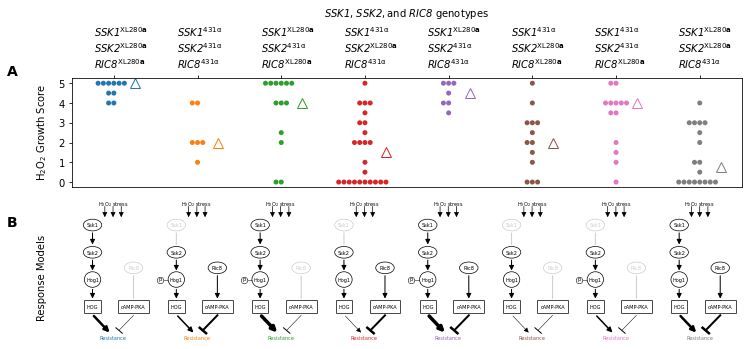

In [16]:
## Another draft of the reponse model
pheno['new_mosaic'] = -1

poi = 'H2O2'
for i,j in genos.iterrows():
    
    
    pheno.loc[(pheno.SSK1==j.SSK1) & (pheno.SSK2==j.SSK2) & (pheno.RIC8==j.RIC8),'new_mosaic'] = i
    
assert pheno.new_mosaic.min()>=0

new_mosaic_df = pheno[['SSK1','SSK2','RIC8','new_mosaic']].drop_duplicates().sort_values('new_mosaic').copy()
parental_label = [r'XL280\bf{a}',r'431\mathrm{\alpha}']
new_x_labels = []
simple_parents = ['XL280','431']
load_images = []

for i,j in new_mosaic_df.iterrows():
    
    xlab = 'SSK1' + r'$^{\rm %s}$'%parental_label[int(j.SSK1)
            ] + '\nSSK2' + r'$^{\rm %s}$'%parental_label[int(j.SSK2)
              ] + '\nRIC8' + r'$^{\rm %s}$'%parental_label[int(j.RIC8)]
    
    new_x_labels.append(xlab)

    
fig,ax= plt.subplots(1,1,figsize=(12,2))

ax.xaxis.tick_top()
ax.set_xlabel('X LABEL')    
ax.xaxis.set_label_position('top') 
swarm = sns.swarmplot(x='new_mosaic',y=poi,data=pheno,palette=my_pal);

for i,j in pheno.groupby('new_mosaic'):
    
    plt.plot(i+.25,j[poi].median(),'^',fillstyle='none',ms=10,color=morecolors[i])

plt.ylabel(' ')
plt.title('SSK1'+r'$\rm{, }$'+' SSK2'+r'$\rm{, and}$'+' RIC8 '+r'$\rm{genotypes}$'+'\n\n\n',
          fontsize=10,style='italic')
plt.xlabel(' ')
plt.xticks(new_mosaic_df.new_mosaic,[])
plt.yticks(np.arange(0,6),fontsize=10)

al = 0.2
ssk1_alpha = new_mosaic_df.SSK1.replace(dict(zip([0,1],[1,al]))).values
ssk2_alpha = new_mosaic_df.SSK2.values#[0,1,1,0,1,0,1,0]
ric8_alpha = new_mosaic_df.RIC8.replace(dict(zip([0,1],[al,1]))).values
ssk1_arrow = ["->","-",'']
ssk1_hight = 1.25
d = .35
ssk2_hight = ssk1_hight - d
hog1_hight = ssk1_hight - 2*d
HOG_hight = ssk1_hight - 3*d
ric_hight = ssk2_hight - .2
my_lw = 0.7
arrow_style = '-|>'
h2o2_hight = 1.525

hog_lw_add = np.array([2,1,3,0,3,0,1,2])+0.5
cAMP_lw_add = (new_mosaic_df['RIC8']*1.5)+0.5

for i,j in enumerate(new_x_labels):
    the_color ='k' # morecolors[i]
    fig.text(x=0.15+(i*0.0966),y=.95,s = j,style='italic',fontsize=10)
    
    az = fig.add_axes([0.125+(i*0.097),-0.95,0.095,1])

    
    ssk1el = mpatches.Ellipse((-1, ssk1_hight), .9, 0.15,  ## SSK1
                              angle=0,alpha=ssk1_alpha[i],
                          edgecolor= the_color, lw=my_lw, facecolor='none')
    
    ssk2el = mpatches.Ellipse((-1, ssk2_hight), .9, 0.15, angle=0,alpha=1, ## SSK2
                          edgecolor = the_color, lw=my_lw, facecolor='none')
                        ##,ls='--'if ssk2_alpha[i]==1 else None)
    
    ricel = mpatches.Ellipse((1, ric_hight), .9, 0.15,alpha= ric8_alpha[i], ## RIC8
                          edgecolor= the_color, lw=my_lw, facecolor='none')
    
    [az.add_artist(r) for r in [ssk1el, ssk2el, ricel]]

    
    hogel = mpatches.Ellipse((-1, hog1_hight), .8, 0.2, angle=0,alpha=1, ## Hog1
                          edgecolor = the_color, lw=my_lw, facecolor='none')
    az.add_artist(hogel)
    
    plt.hlines((HOG_hight-0.081,HOG_hight+0.081),0.25,1.75,lw=my_lw,color= the_color)
    plt.vlines((0.25,1.75),HOG_hight-0.081,HOG_hight+0.081,lw=my_lw,color= the_color)
    
    
    plt.hlines((HOG_hight-0.081,HOG_hight+0.081),-0.6,-1.4,lw=my_lw,color= the_color)
    plt.vlines((-0.6,-1.4),HOG_hight-0.081,HOG_hight+0.081,lw=my_lw,color= the_color)

    
    the_color='k'
    
    plt.xlim(-2,2)
    plt.ylim(-0.25,1.6)
    
    az.annotate("",
            xy=(-1, ssk2_hight + 0.075), xycoords='data',
            xytext=(-1, ssk1_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ssk1_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ssk1_alpha[i],color=the_color))
    
    az.annotate("",
            xy=(-1, hog1_hight + 0.09), xycoords='data',
            xytext=(-1, ssk2_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style,linewidth=1,color=the_color))
    
    az.annotate("",
            xy=(-1, HOG_hight + 0.08), xycoords='data',
            xytext=(-1, hog1_hight-0.1), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style,
                            linewidth=1,color=the_color))
    
    az.annotate("",
            xy=(1, HOG_hight + 0.08), xycoords='data',
            xytext=(1, ric_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ric8_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ric8_alpha[i],color=the_color))
    
    plt.text(-1,ssk1_hight,'Ssk1',fontsize=5,va='center',ha='center',alpha=ssk1_alpha[i])
    plt.text(1,ric_hight,'Ric8',fontsize=5,va='center',ha='center',alpha=ric8_alpha[i])
    plt.text(-1,ssk2_hight,'Ssk2',fontsize=5,va='center',ha='center')
    plt.text(-1,hog1_hight,'Hog1',fontsize=5,va='center',ha='center')
    plt.text(1,HOG_hight,'cAMP-PKA',fontsize=5,va='center',ha='center')
    plt.text(-1,HOG_hight,'HOG',fontsize=5,va='center',ha='center')
    plt.text(0,-0.2,'Resistance',fontsize=5,va='center',ha='center',color=morecolors[i])
    
    if ssk2_alpha[i] == 1:
        plt.hlines(hog1_hight,-1.42,-1.67,linewidth=.5,color=the_color)
        plt.plot(-1.8,hog1_hight,'o',ms=6,color=the_color)
        plt.plot(-1.8,hog1_hight,'wo',ms=5)
        plt.text(-1.8,hog1_hight+0.008,'p',ha='center',va='center',fontsize=5)
    
    ## HOG signal arrow
    az.annotate("",
            xy=(-1, 0.1), xycoords='data',
            xytext=(-0.1, -0.15), textcoords='data',
            arrowprops=dict(arrowstyle='<|-',
                            color=the_color,linewidth=hog_lw_add[i] ))
    
    ## H2O2 stress arrows
    [az.annotate("",xy=(x,h2o2_hight-0.01),xycoords='data',xytext=(x,h2o2_hight-0.2),textcoords='data',
                 arrowprops=dict(arrowstyle='<|-',color=the_color,linewidth=my_lw )) for x in [-0.4,0,0.4]]

    
    plt.plot([0.3,1],[-0.1,0.09],linewidth=cAMP_lw_add[i],color=the_color)
    plt.plot([0.14,0.45],np.array([-0.07,-.14]),color=the_color,linewidth=0.5+cAMP_lw_add[i])
    
    plt.text(0,h2o2_hight,'H$_{2}$O$_{2}$ stress',va='center',ha='center',fontsize=5)
    plt.axis('off')
myylabel1 = 'H$_{2}$O$_{2}$ Growth Score'
myylabel2 = 'Response Models'
fig.text(0.09,0.51,s=myylabel1,rotation=90,va='center',ha='center',fontsize=10)
fig.text(0.09,-0.5,s=myylabel2,rotation=90,va='center',ha='center',fontsize=10)

fig.text(0.05,0.9,s='A',fontsize=14,fontweight='bold')
fig.text(0.05,-0.15,s='B',fontsize=14,fontweight='bold');

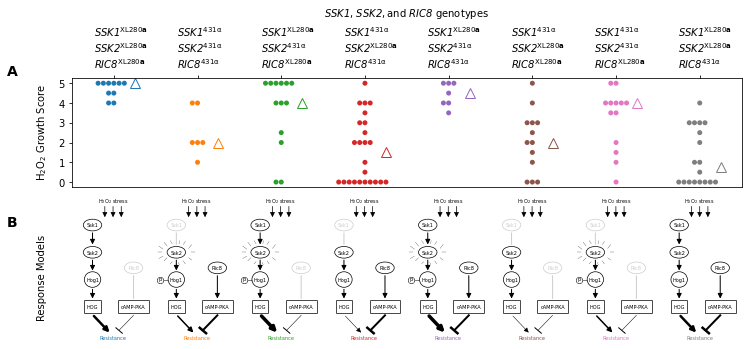

In [17]:
## version of figure above with blinking SSK2
pheno['new_mosaic'] = -1

poi = 'H2O2'
for i,j in genos.iterrows():
    
    
    pheno.loc[(pheno.SSK1==j.SSK1) & (pheno.SSK2==j.SSK2) & (pheno.RIC8==j.RIC8),'new_mosaic'] = i
    
assert pheno.new_mosaic.min()>=0

new_mosaic_df = pheno[['SSK1','SSK2','RIC8','new_mosaic']].drop_duplicates().sort_values('new_mosaic').copy()
parental_label = [r'XL280\bf{a}',r'431\mathrm{\alpha}']
new_x_labels = []
simple_parents = ['XL280','431']
load_images = []

for i,j in new_mosaic_df.iterrows():
    
    xlab = 'SSK1' + r'$^{\rm %s}$'%parental_label[int(j.SSK1)
            ] + '\nSSK2' + r'$^{\rm %s}$'%parental_label[int(j.SSK2)
              ] + '\nRIC8' + r'$^{\rm %s}$'%parental_label[int(j.RIC8)]
    
    new_x_labels.append(xlab)

    
fig,ax= plt.subplots(1,1,figsize=(12,2))

ax.xaxis.tick_top()
ax.set_xlabel('X LABEL')    
ax.xaxis.set_label_position('top') 
swarm = sns.swarmplot(x='new_mosaic',y=poi,data=pheno,palette=my_pal);

for i,j in pheno.groupby('new_mosaic'):
    
    plt.plot(i+.25,j[poi].median(),'^',fillstyle='none',ms=10,color=morecolors[i])

plt.ylabel(' ')
plt.title('SSK1'+r'$\rm{, }$'+' SSK2'+r'$\rm{, and}$'+' RIC8 '+r'$\rm{genotypes}$'+'\n\n\n',
          fontsize=10,style='italic')
plt.xlabel(' ')
plt.xticks(new_mosaic_df.new_mosaic,[])
plt.yticks(np.arange(0,6),fontsize=10)

al = 0.2
ssk1_alpha = new_mosaic_df.SSK1.replace(dict(zip([0,1],[1,al]))).values
ssk2_alpha = new_mosaic_df.SSK2.values#[0,1,1,0,1,0,1,0]
ric8_alpha = new_mosaic_df.RIC8.replace(dict(zip([0,1],[al,1]))).values
ssk1_arrow = ["->","-",'']
ssk1_hight = 1.25
d = .35
ssk2_hight = ssk1_hight - d
hog1_hight = ssk1_hight - 2*d
HOG_hight = ssk1_hight - 3*d
ric_hight = ssk2_hight - .2
my_lw = 0.7
arrow_style = '-|>'
h2o2_hight = 1.525

hog_lw_add = np.array([2,1,3,0,3,0,1,2])+0.5
cAMP_lw_add = (new_mosaic_df['RIC8']*1.5)+0.5

for i,j in enumerate(new_x_labels):
    the_color ='k' # morecolors[i]
    fig.text(x=0.15+(i*0.0966),y=.95,s = j,style='italic',fontsize=10)
    
    az = fig.add_axes([0.125+(i*0.097),-0.95,0.095,1])

    
    ssk1el = mpatches.Ellipse((-1, ssk1_hight), .9, 0.15,  ## SSK1
                              angle=0,alpha=ssk1_alpha[i],
                          edgecolor= the_color, lw=my_lw, facecolor='none')
    
    ssk2el = mpatches.Ellipse((-1, ssk2_hight), .9, 0.15, angle=0,alpha=1, ## SSK2
                          edgecolor = the_color, lw=my_lw, facecolor='none')
                        ##,ls='--'if ssk2_alpha[i]==1 else None)
    
    ricel = mpatches.Ellipse((1, ric_hight), .9, 0.15,alpha= ric8_alpha[i], ## RIC8
                          edgecolor= the_color, lw=my_lw, facecolor='none')
    
    [az.add_artist(r) for r in [ssk1el, ssk2el, ricel]]

    
    hogel = mpatches.Ellipse((-1, hog1_hight), .8, 0.2, angle=0,alpha=1, ## Hog1
                          edgecolor = the_color, lw=my_lw, facecolor='none')
    az.add_artist(hogel)
    
    plt.hlines((HOG_hight-0.081,HOG_hight+0.081),0.25,1.75,lw=my_lw,color= the_color)
    plt.vlines((0.25,1.75),HOG_hight-0.081,HOG_hight+0.081,lw=my_lw,color= the_color)
    
    
    plt.hlines((HOG_hight-0.081,HOG_hight+0.081),-0.6,-1.4,lw=my_lw,color= the_color)
    plt.vlines((-0.6,-1.4),HOG_hight-0.081,HOG_hight+0.081,lw=my_lw,color= the_color)

    
    the_color='k'
    
    plt.xlim(-2,2)
    plt.ylim(-0.25,1.6)
    
    az.annotate("",
            xy=(-1, ssk2_hight + 0.075), xycoords='data',
            xytext=(-1, ssk1_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ssk1_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ssk1_alpha[i],color=the_color))
    
    az.annotate("",
            xy=(-1, hog1_hight + 0.09), xycoords='data',
            xytext=(-1, ssk2_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style,linewidth=1,color=the_color))
    
    az.annotate("",
            xy=(-1, HOG_hight + 0.08), xycoords='data',
            xytext=(-1, hog1_hight-0.1), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style,
                            linewidth=1,color=the_color))
    
    az.annotate("",
            xy=(1, HOG_hight + 0.08), xycoords='data',
            xytext=(1, ric_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ric8_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ric8_alpha[i],color=the_color))
    
    plt.text(-1,ssk1_hight,'Ssk1',fontsize=5,va='center',ha='center',alpha=ssk1_alpha[i])
    plt.text(1,ric_hight,'Ric8',fontsize=5,va='center',ha='center',alpha=ric8_alpha[i])
    plt.text(-1,ssk2_hight,'Ssk2',fontsize=5,va='center',ha='center')
    plt.text(-1,hog1_hight,'Hog1',fontsize=5,va='center',ha='center')
    plt.text(1,HOG_hight,'cAMP-PKA',fontsize=5,va='center',ha='center')
    plt.text(-1,HOG_hight,'HOG',fontsize=5,va='center',ha='center')
    plt.text(0,-0.2,'Resistance',fontsize=5,va='center',ha='center',color=morecolors[i])
    
    if ssk2_alpha[i] == 1:
        plt.hlines(hog1_hight,-1.42,-1.67,linewidth=.5,color=the_color)
        plt.plot(-1.8,hog1_hight,'o',ms=6,color=the_color)
        plt.plot(-1.8,hog1_hight,'wo',ms=5)
        plt.text(-1.8,hog1_hight+0.008,'p',ha='center',va='center',fontsize=5)
        plt.plot([-1.7,-1.9],[.9,.9],'k',linewidth=.25)
        plt.plot([-1.65,-1.85],[.94,.98],'k',linewidth=.25)
        plt.plot([-1.45,-1.6],[.98,1.03],'k',linewidth=.25)
        plt.plot([-1.2,-1.3],[1.01,1.05],'k',linewidth=.25)
        plt.plot([-.87,-.83],[1.01,1.05],'k',linewidth=.25)
        plt.plot([-.66,-.56],[1,1.04],'k',linewidth=.25)
        plt.plot([-.4,-.25],[.95,1.0],'k',linewidth=.25)
        plt.plot([-.3,-.1],[.9,.9],'k',linewidth=.25)
        plt.plot([-1.65,-1.85],[.85,.82],'k',linewidth=.25)
        plt.plot([-1.45,-1.6],[.83,.79],'k',linewidth=.25)
        plt.plot([-1.2,-1.3],[.78,.75],'k',linewidth=.25)
        plt.plot([-.9,-.85],[.77,.74],'k',linewidth=.25)
        plt.plot([-.66,-.56],[.79,.75],'k',linewidth=.25)
        plt.plot([-.4,-.25],[.83,.8],'k',linewidth=.25)
    
    ## HOG signal arrow
    az.annotate("",
            xy=(-1, 0.1), xycoords='data',
            xytext=(-0.1, -0.15), textcoords='data',
            arrowprops=dict(arrowstyle='<|-',
                            color=the_color,linewidth=hog_lw_add[i] ))
    
    ## H2O2 stress arrows
    [az.annotate("",xy=(x,h2o2_hight-0.01),xycoords='data',xytext=(x,h2o2_hight-0.2),textcoords='data',
                 arrowprops=dict(arrowstyle='<|-',color=the_color,linewidth=my_lw )) for x in [-0.4,0,0.4]]

    
    plt.plot([0.3,1],[-0.1,0.09],linewidth=cAMP_lw_add[i],color=the_color)
    plt.plot([0.14,0.45],np.array([-0.07,-.14]),color=the_color,linewidth=0.5+cAMP_lw_add[i])
    
    plt.text(0,h2o2_hight+0.03,'H$_{2}$O$_{2}$ stress',va='center',ha='center',fontsize=5)
    plt.axis('off')

myylabel1 = 'H$_{2}$O$_{2}$ Growth Score'
myylabel2 = 'Response Models'
fig.text(0.09,0.51,s=myylabel1,rotation=90,va='center',ha='center',fontsize=10)
fig.text(0.09,-0.5,s=myylabel2,rotation=90,va='center',ha='center',fontsize=10)

fig.text(0.05,0.9,s='A',fontsize=14,fontweight='bold')
fig.text(0.05,-0.15,s='B',fontsize=14,fontweight='bold');

In [18]:
## Reorder the groups above by means
new_mosaic_df['new_mosaic2'] = [7,2,5,1,6,3,4,0]
new_mosaic_df['GC'] = [my_pal[i] for i in new_mosaic_df.new_mosaic]
new_mosaic_df.sort_values('new_mosaic2',inplace=True)

pheno2 = pheno.merge(new_mosaic_df[['new_mosaic','new_mosaic2']])
my_pal2 = dict(zip(new_mosaic_df.new_mosaic2,new_mosaic_df.GC))
morecolors2 = new_mosaic_df.GC.tolist()

hog_sig = new_mosaic_df[['SSK1','SSK2']].drop_duplicates().reset_index(drop=True)
hog_sig['HOG'] = np.array([1,0,1,2]) + 0.5

new_mosaic_df = new_mosaic_df.merge(hog_sig)
new_mosaic_df.sort_values('new_mosaic2',inplace=True)
new_mosaic_df.reset_index(drop=True,inplace=True)

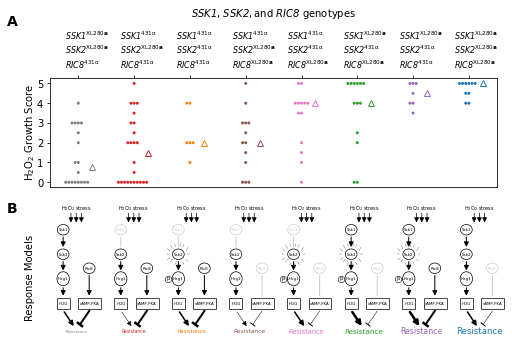

In [19]:
## Make final draft of Figure 10
new_x_labels = []
for i,j in new_mosaic_df.iterrows():
    
    xlab = 'SSK1' + r'$^{\rm %s}$'%parental_label[int(j.SSK1)
            ] + '\nSSK2' + r'$^{\rm %s}$'%parental_label[int(j.SSK2)
              ] + '\nRIC8' + r'$^{\rm %s}$'%parental_label[int(j.RIC8)]
    
    new_x_labels.append(xlab)

    
fig,ax= plt.subplots(1,1,figsize=(8,2))

ax.xaxis.tick_top()
ax.set_xlabel('X LABEL')    
ax.xaxis.set_label_position('top') 
swarm = sns.swarmplot(x='new_mosaic2',y=poi,data=pheno2,palette=my_pal2,size=3);

for i,j in pheno2.groupby('new_mosaic2'):
    
    plt.plot(i+.25,j[poi].median(),'^',fillstyle='none',ms=6,color=morecolors2[i])

plt.ylabel(' ')
plt.title('SSK1'+r'$\rm{, }$'+' SSK2'+r'$\rm{, and}$'+' RIC8 '+r'$\rm{genotypes}$'+'\n\n\n',
          fontsize=10,style='italic')
plt.xlabel(' ')
plt.xticks(new_mosaic_df.new_mosaic,[])
plt.yticks(np.arange(0,6),fontsize=10)

al = 0.2
ssk1_alpha = new_mosaic_df.SSK1.replace(dict(zip([0,1],[1,al]))).values
ssk2_alpha = new_mosaic_df.SSK2.values#[0,1,1,0,1,0,1,0]
ric8_alpha = new_mosaic_df.RIC8.replace(dict(zip([0,1],[al,1]))).values
ssk1_arrow = ["->","-",'']
ssk1_hight = 1.25
d = .35
ssk2_hight = ssk1_hight - d
hog1_hight = ssk1_hight - 2*d
HOG_hight = ssk1_hight - 3*d
ric_hight = ssk2_hight - .2
my_lw = 0.7
arrow_style = '-|>'
h2o2_hight = 1.525

hog_lw_add = new_mosaic_df['HOG'].values#np.array([2,1,3,0,3,0,1,2])+0.5
cAMP_lw_add = (new_mosaic_df['RIC8']*1.5)+0.5

fs = 4
for i,j in enumerate(new_x_labels):
    the_color ='k' # morecolors2[i]
    fig.text(x=0.15+(i*0.0966),y=.95,s = j,style='italic',fontsize=8)
    
    az = fig.add_axes([0.12+(i*0.1),-0.9,0.095,.9])

    
    ssk1el = mpatches.Ellipse((-1, ssk1_hight), .9, 0.15,  ## SSK1
                              angle=0,alpha=ssk1_alpha[i],
                          edgecolor= the_color, lw=my_lw, facecolor='none')
    
    ssk2el = mpatches.Ellipse((-1, ssk2_hight), .9, 0.15, angle=0,alpha=1, ## SSK2
                          edgecolor = the_color, lw=my_lw, facecolor='none')
                        ##,ls='--'if ssk2_alpha[i]==1 else None)
    
    ricel = mpatches.Ellipse((1, ric_hight), .9, 0.15,alpha= ric8_alpha[i], ## RIC8
                          edgecolor= the_color, lw=my_lw, facecolor='none')
    
    [az.add_artist(r) for r in [ssk1el, ssk2el, ricel]]

    
    hogel = mpatches.Ellipse((-1, hog1_hight), .95, 0.2, angle=0,alpha=1, ## Hog1
                          edgecolor = the_color, lw=my_lw, facecolor='none')
    az.add_artist(hogel)
    
    plt.hlines((HOG_hight-0.081,HOG_hight+0.081),0.15,1.9,lw=my_lw,color= the_color)
    plt.vlines((0.15,1.9),HOG_hight-0.081,HOG_hight+0.081,lw=my_lw,color= the_color)
    
    plt.hlines((HOG_hight-0.081,HOG_hight+0.081),-0.5,-1.5,lw=my_lw,color= the_color)
    plt.vlines((-0.5,-1.5),HOG_hight-0.081,HOG_hight+0.081,lw=my_lw,color= the_color)

    
    the_color='k'
    
    plt.xlim(-2.2,2)
    plt.ylim(-0.25,1.6)
    
    az.annotate("",
            xy=(-1, ssk2_hight + 0.075), xycoords='data',
            xytext=(-1, ssk1_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ssk1_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ssk1_alpha[i],color=the_color))
    
    az.annotate("",
            xy=(-1, hog1_hight + 0.09), xycoords='data',
            xytext=(-1, ssk2_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style,linewidth=1,color=the_color))
    
    az.annotate("",
            xy=(-1, HOG_hight + 0.08), xycoords='data',
            xytext=(-1, hog1_hight-0.1), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style,
                            linewidth=1,color=the_color))
    
    az.annotate("",
            xy=(1, HOG_hight + 0.08), xycoords='data',
            xytext=(1, ric_hight-0.075), textcoords='data',
            arrowprops=dict(arrowstyle= arrow_style if ric8_alpha[i] == 1 else "-" ,
                            linewidth=1,alpha= ric8_alpha[i],color=the_color))
    
    plt.text(-1,ssk1_hight,'Ssk1',fontsize=fs,va='center',ha='center',alpha=ssk1_alpha[i])
    plt.text(1,ric_hight,'Ric8',fontsize=fs,va='center',ha='center',alpha=ric8_alpha[i])
    plt.text(-1,ssk2_hight,'Ssk2',fontsize=fs,va='center',ha='center')
    plt.text(-1,hog1_hight,'Hog1',fontsize=fs,va='center',ha='center')
    plt.text(1,HOG_hight,'cAMP-PKA',fontsize=fs,va='center',ha='center')
    plt.text(-1,HOG_hight,'HOG',fontsize=fs,va='center',ha='center')
    plt.text(0,-0.2,'Resistance',fontsize=fs+(i*0.65),va='center',ha='center',color=morecolors2[i])
    
    if ssk2_alpha[i] == 1:
        plt.hlines(hog1_hight,-1.45,-1.67,linewidth=.5,color=the_color)
        plt.plot(-1.8,hog1_hight,'o',ms=6,color=the_color)
        plt.plot(-1.8,hog1_hight,'wo',ms=5)
        plt.text(-1.8,hog1_hight+0.008,'p',ha='center',va='center',fontsize=5)
        plt.plot([-1.7,-1.9],[.9,.9],'k',linewidth=.25)
        plt.plot([-1.65,-1.85],[.94,.98],'k',linewidth=.25)
        plt.plot([-1.45,-1.6],[.98,1.03],'k',linewidth=.25)
        plt.plot([-1.2,-1.3],[1.01,1.05],'k',linewidth=.25)
        plt.plot([-.87,-.83],[1.01,1.05],'k',linewidth=.25)
        plt.plot([-.66,-.56],[1,1.04],'k',linewidth=.25)
        plt.plot([-.4,-.25],[.95,1.0],'k',linewidth=.25)
        plt.plot([-.3,-.1],[.9,.9],'k',linewidth=.25)
        plt.plot([-1.65,-1.85],[.85,.82],'k',linewidth=.25)
        plt.plot([-1.45,-1.6],[.83,.79],'k',linewidth=.25)
        plt.plot([-1.2,-1.3],[.78,.75],'k',linewidth=.25)
        plt.plot([-.9,-.85],[.77,.74],'k',linewidth=.25)
        plt.plot([-.66,-.56],[.79,.75],'k',linewidth=.25)
        plt.plot([-.4,-.25],[.83,.8],'k',linewidth=.25)
    
    ## HOG signal arrow
    az.annotate("",
            xy=(-1, 0.1), xycoords='data',
            xytext=(-0.1, -0.15), textcoords='data',
            arrowprops=dict(arrowstyle='<|-',
                            color=the_color,linewidth=hog_lw_add[i] ))
    
    ## H2O2 stress arrows
    [az.annotate("",xy=(x,h2o2_hight-0.01),xycoords='data',xytext=(x,h2o2_hight-0.2),textcoords='data',
                 arrowprops=dict(arrowstyle='<|-',color=the_color,linewidth=my_lw )) for x in [-0.4,0,0.4]]

    
    plt.plot([0.3,1],[-0.1,0.09],linewidth=cAMP_lw_add[i],color=the_color)
    plt.plot([0.13,0.45],np.array([-0.08,-.125]),color=the_color,linewidth=0.5+cAMP_lw_add[i])
    
    plt.text(0,h2o2_hight+0.03,'H$_{2}$O$_{2}$ stress',va='center',ha='center',fontsize=5)
    plt.axis('off')

myylabel1 = 'H$_{2}$O$_{2}$ Growth Score'
myylabel2 = 'Response Models'
fig.text(0.09,0.51,s=myylabel1,rotation=90,va='center',ha='center',fontsize=10)
fig.text(0.09,-0.5,s=myylabel2,rotation=90,va='center',ha='center',fontsize=10)

fig.text(0.05,1.25,s='A',fontsize=14,fontweight='bold')
fig.text(0.05,-0.05,s='B',fontsize=14,fontweight='bold')


mydpi=600

plt.savefig('../FIGURES/MAIN/PDFs/Fig10.pdf',
            dpi=mydpi,bbox_inches='tight',pad_inches=1)


plos_path = '../FIGURES/MAIN/TIFF/Fig10.tiff'
plt.savefig(plos_path,dpi=mydpi,bbox_inches='tight')

im = Image.open(plos_path)

w,h = im.size
assert w/mydpi < 7.5
assert h/mydpi < 8

im.save(plos_path,compression='tiff_lzw');